In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [3]:
df = pd.read_csv('CC.csv')  # Replace with your path

# Display basic info
print(df.shape)
df.head()


(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# Check missing values
print(df.isnull().sum())

# Drop CUST_ID and fill missing values
df.drop('CUST_ID', axis=1, inplace=True)
df.fillna(df.mean(), inplace=True)

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [7]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)


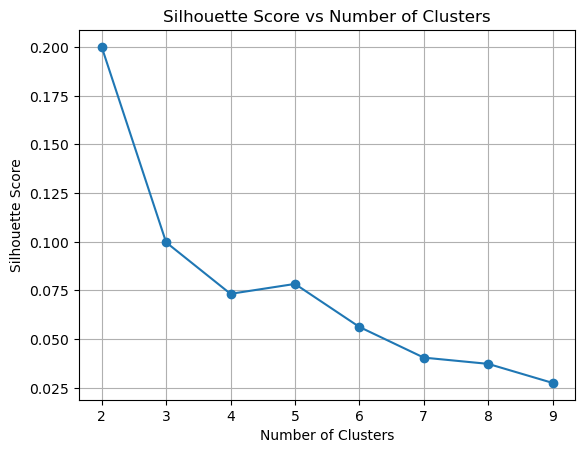

In [11]:
# Try different number of clusters
sil_scores = []
for n in range(2, 10):
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df_scaled)
    labels = gmm.predict(df_scaled)
    sil_scores.append(silhouette_score(df_scaled, labels))

# Plot silhouette scores
plt.plot(range(2, 10), sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid()
plt.show()


In [13]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(df_scaled)
labels = gmm.predict(df_scaled)

# Add cluster label to DataFrame
df['Cluster'] = labels


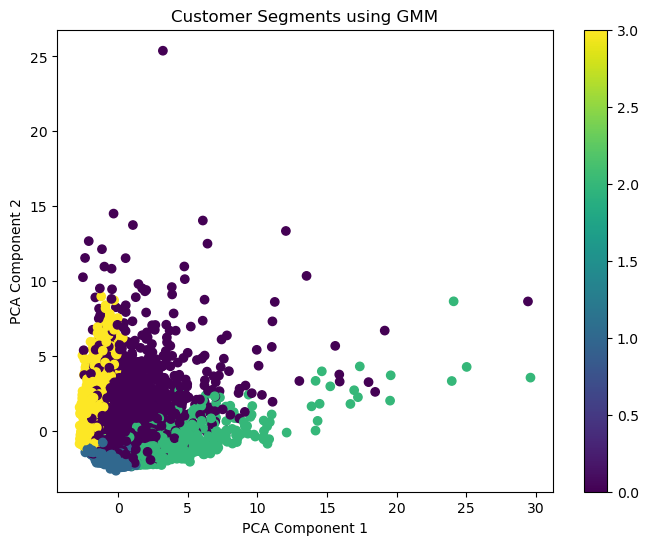

In [14]:
# Use PCA-reduced features
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0], df_pca[:,1], c=labels, cmap='viridis')
plt.title('Customer Segments using GMM')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


In [15]:
df.groupby('Cluster').mean()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,2643.504771,0.943941,1488.136095,905.308247,582.930347,1939.425263,0.659565,0.290874,0.490007,0.254011,6.828599,22.049109,5254.340127,2815.532700,1923.419193,0.086331,11.345209
1,47.293641,0.668885,385.791467,73.495586,312.640577,0.051589,0.601008,0.050506,0.524486,0.000049,0.001179,8.267531,3358.636185,447.868625,184.490174,0.357121,11.268120
2,1177.570492,0.943127,2042.621699,1263.286256,780.095825,0.130868,0.759159,0.406233,0.545055,0.000134,0.001610,28.253221,5200.175873,2044.104384,599.363406,0.207627,12.000000
3,2045.374401,0.896427,59.162025,59.162025,0.000000,1757.911427,0.041998,0.041998,0.000000,0.253173,5.530461,0.611441,3972.962727,1421.317872,719.839659,0.027733,11.361813
